In [2]:
import pandas as pd

In [3]:
train_data = pd.read_csv('samsum_csv_data/train.csv')

In [3]:
train_data.head()

,id,dialogue,summary
0,13818513,Amanda: I baked cookies. Do you want some?\nJ...,Amanda baked cookies and will bring Jerry some...
1,13728867,Olivia: Who are you voting for in this electio...,Olivia and Olivier are voting for liberals in ...
2,13681000,"Tim: Hi, what's up?\nKim: Bad mood tbh, I was ...",Kim may try the pomodoro technique recommended...
3,13730747,"Edward: Rachel, I think I'm in ove with Bella....",Edward thinks he is in love with Bella. Rachel...
4,13728094,Sam: hey overheard rick say something\nSam: i...,"Sam is confused, because he overheard Rick com..."


In [4]:
train_data.shape

(14732, 3)

In [4]:
test = pd.read_csv('samsum_csv_data/test.csv')
validate = pd.read_csv('samsum_csv_data/validation.csv')

test.shape, validate.shape

# 16369 total records, 5% test 5% validate

((819, 3), (818, 3))

In [4]:
train = train_data

In [7]:
def add_text_features(df):
    df["summary_char_len"] = df["summary"].astype(str).apply(len)
    df["dialogue_char_len"] = df["dialogue"].astype(str).apply(len)
    df["dialogue_num_lines"] = df["dialogue"].astype(str).apply(lambda x: x.count("\n") + 1 if x.strip() else 0)
    return df

train = add_text_features(train)
validate = add_text_features(validate)
test = add_text_features(test)

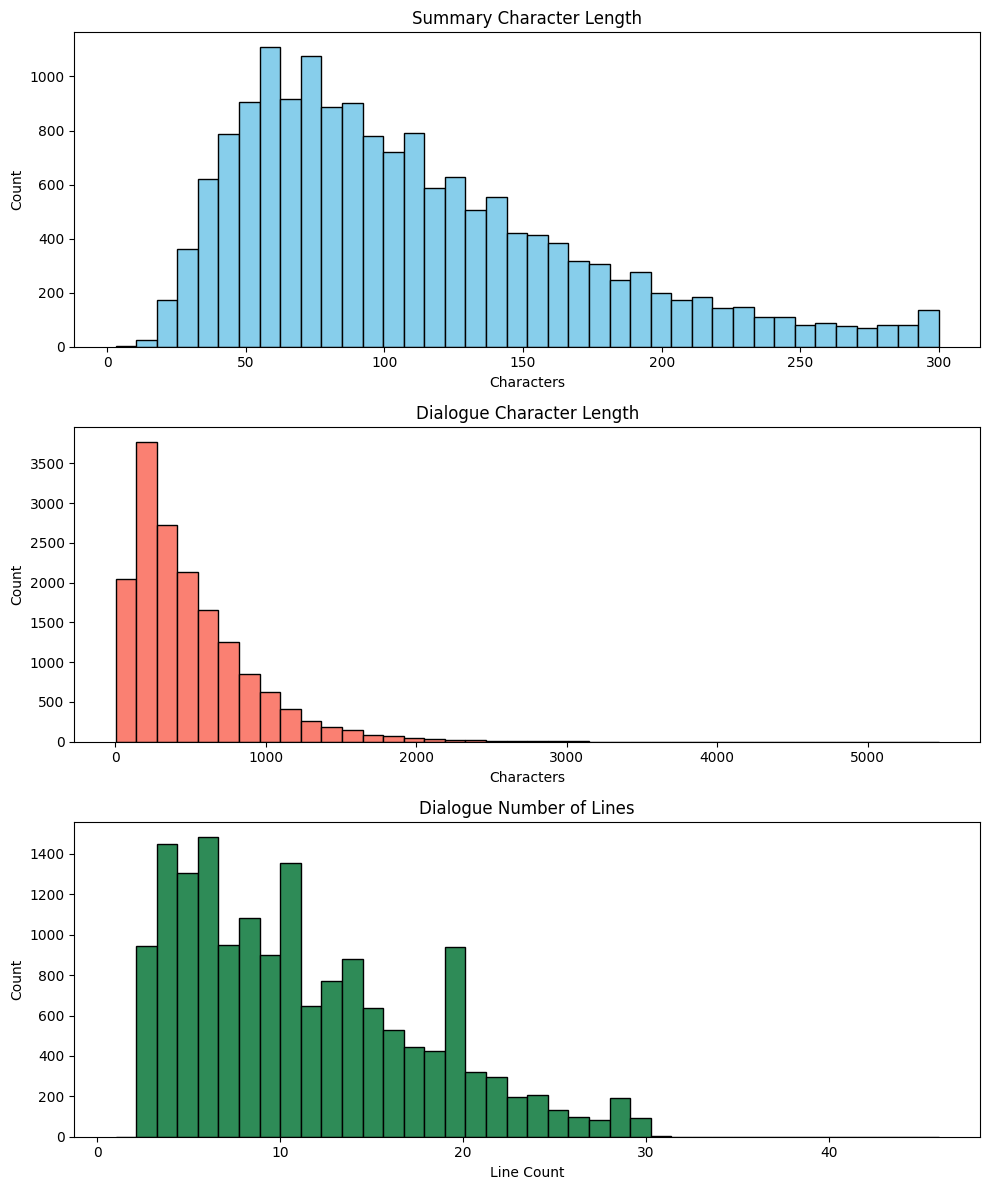

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Combine all sets into one DataFrame for unified plotting
combined = pd.concat([train, validate, test], ignore_index=True)

# Plot histograms
fig, axes = plt.subplots(3, 1, figsize=(10, 12), tight_layout=True)

axes[0].hist(combined["summary_char_len"], bins=40, color="skyblue", edgecolor="black")
axes[0].set_title("Summary Character Length")
axes[0].set_xlabel("Characters")
axes[0].set_ylabel("Count")

axes[1].hist(combined["dialogue_char_len"], bins=40, color="salmon", edgecolor="black")
axes[1].set_title("Dialogue Character Length")
axes[1].set_xlabel("Characters")
axes[1].set_ylabel("Count")

axes[2].hist(combined["dialogue_num_lines"], bins=40, color="seagreen", edgecolor="black")
axes[2].set_title("Dialogue Number of Lines")
axes[2].set_xlabel("Line Count")
axes[2].set_ylabel("Count")

plt.show()


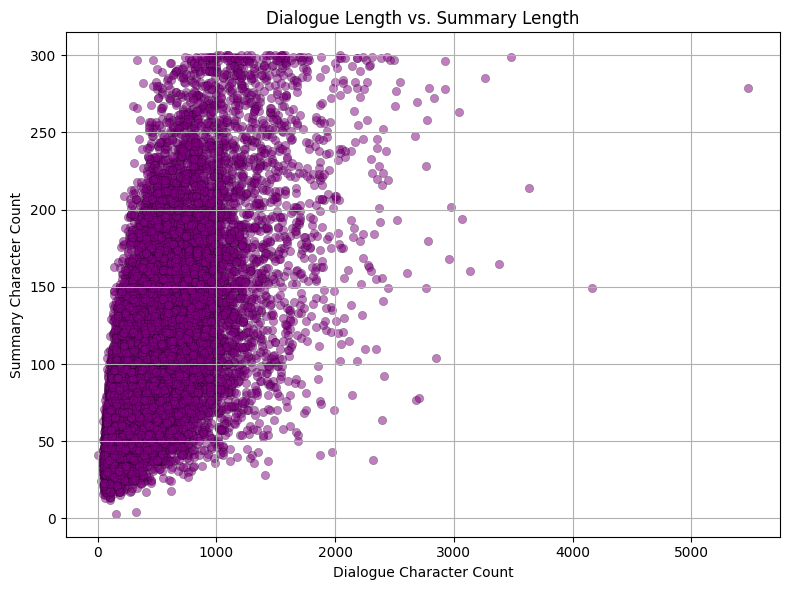

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(combined["dialogue_char_len"], combined["summary_char_len"], 
            alpha=0.5, color="purple", edgecolor="black", linewidth=0.3)

plt.title("Dialogue Length vs. Summary Length")
plt.xlabel("Dialogue Character Count")
plt.ylabel("Summary Character Count")
plt.grid(True)
plt.tight_layout()
plt.show()

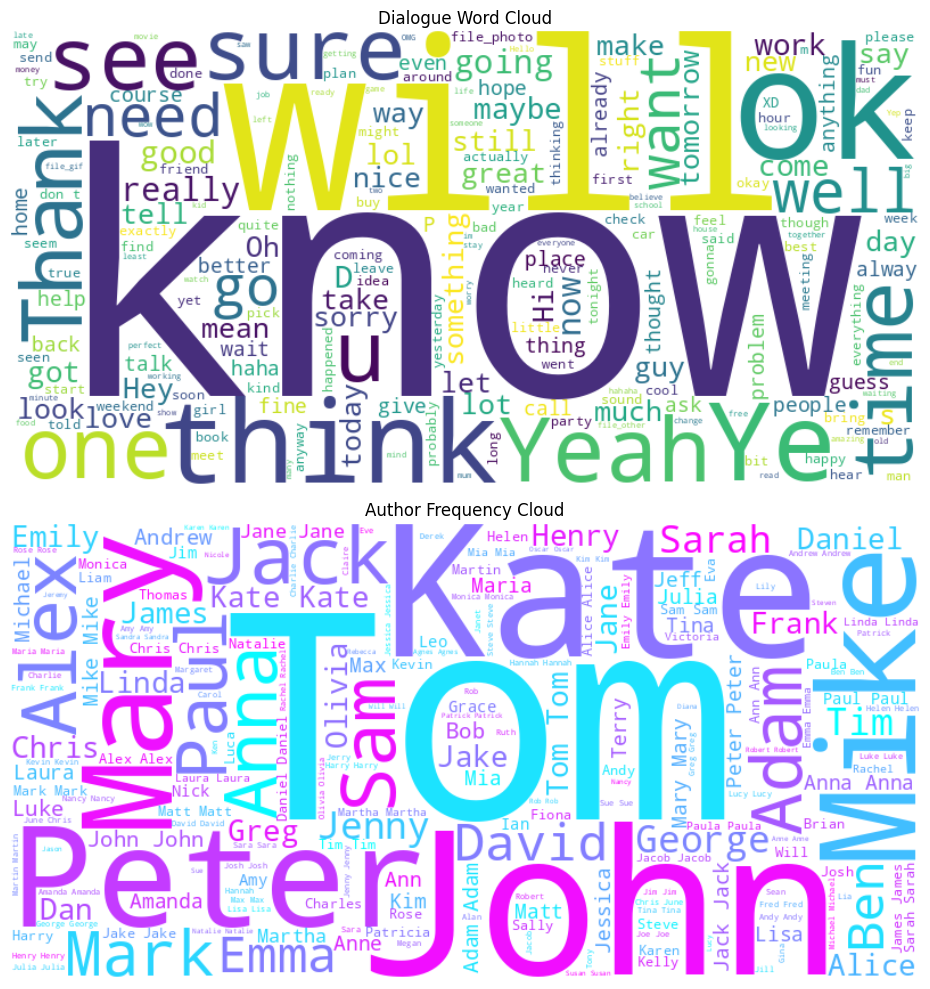

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import re

# Combine dialogue from all splits
full_dialogue = pd.concat([train["dialogue"], validate["dialogue"], test["dialogue"]], ignore_index=True)

# Lists for words and authors
all_text = []
all_authors = []

for entry in full_dialogue.dropna():
    lines = entry.strip().split("\n")
    for line in lines:
        parts = line.split(":", 1)
        if len(parts) == 2:
            speaker = parts[0].strip()
            utterance = parts[1].strip()
            all_authors.append(speaker)
            all_text.append(utterance)

# Join for word clouds
dialogue_text = " ".join(all_text)
authors_text = " ".join(all_authors)

# Generate word clouds
wordcloud_dialogue = WordCloud(width=800, height=400, background_color="white").generate(dialogue_text)
wordcloud_authors = WordCloud(width=800, height=400, background_color="white", colormap="cool").generate(authors_text)

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
axes[0].imshow(wordcloud_dialogue, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("Dialogue Word Cloud")

axes[1].imshow(wordcloud_authors, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title("Author Frequency Cloud")

plt.tight_layout()
plt.show()


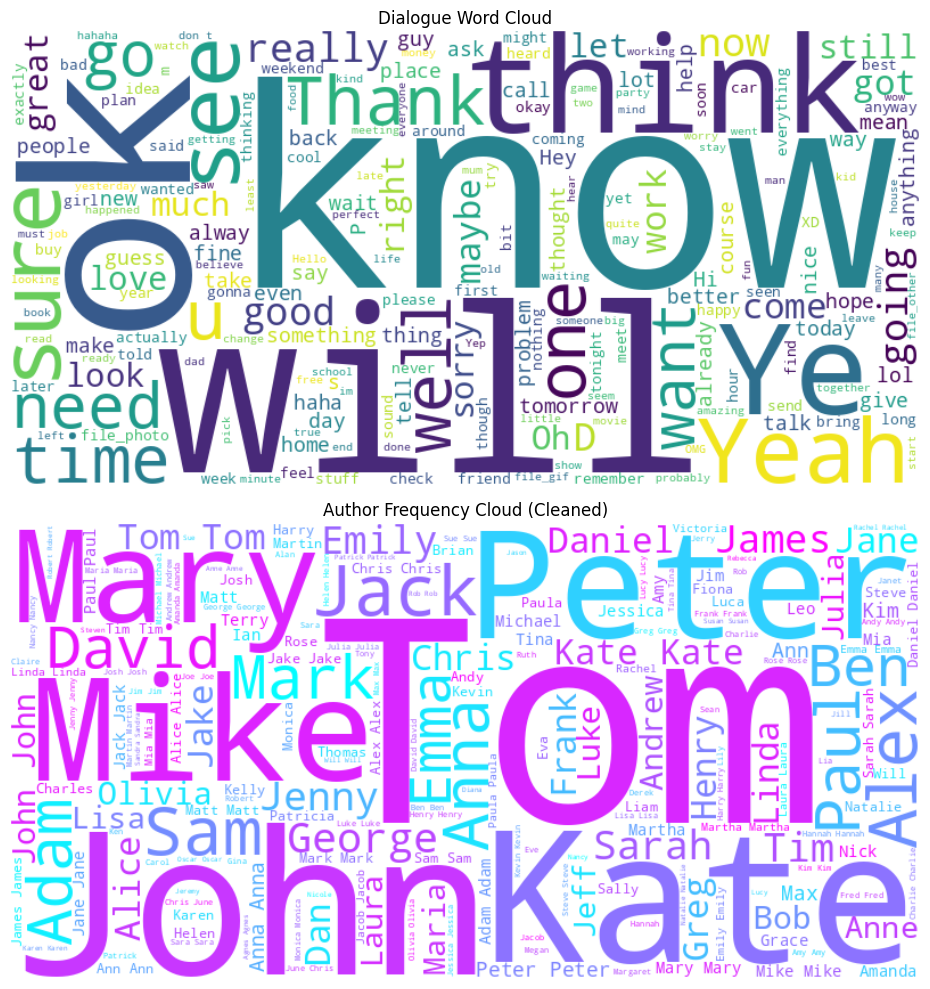

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Combine dialogues
full_dialogue = pd.concat([train["dialogue"], validate["dialogue"], test["dialogue"]], ignore_index=True)

# Clean and collect authors and dialogue
all_text = []
all_authors = []

for entry in full_dialogue.dropna():
    lines = entry.strip().split("\n")
    for line in lines:
        parts = line.split(":", 1)
        if len(parts) == 2:
            speaker = parts[0].strip()
            utterance = parts[1].strip()
            all_authors.append(speaker)
            all_text.append(utterance)

# Make sure there’s no lingering whitespace by aggressively cleaning author names
all_authors = [name.strip() for name in all_authors if name]

# Create text blobs
dialogue_text = " ".join(all_text)
authors_text = " ".join(all_authors)

# Generate word clouds
wordcloud_dialogue = WordCloud(width=800, height=400, background_color="white").generate(dialogue_text)
wordcloud_authors = WordCloud(width=800, height=400, background_color="white", colormap="cool").generate(authors_text)

# Display
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
axes[0].imshow(wordcloud_dialogue, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("Dialogue Word Cloud")

axes[1].imshow(wordcloud_authors, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title("Author Frequency Cloud (Cleaned)")

plt.tight_layout()
plt.show()

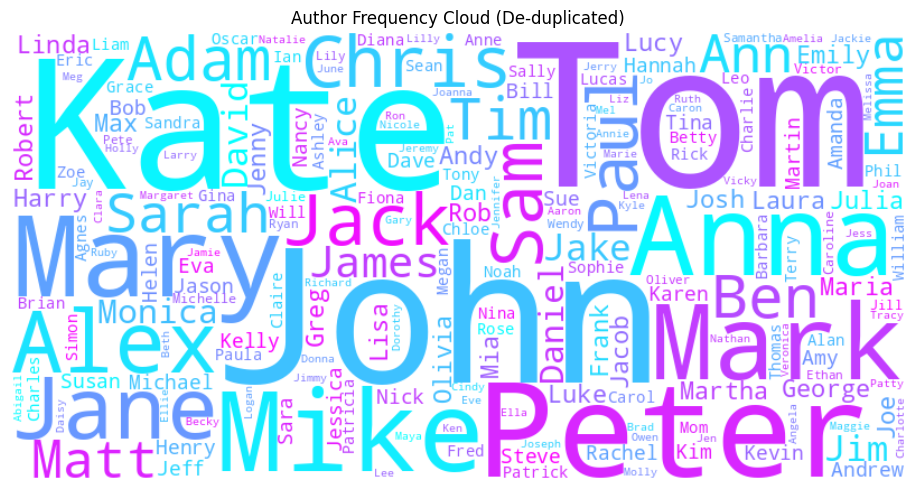

In [14]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Build a frequency dictionary
author_freq = Counter(all_authors)

# Generate author word cloud using frequencies
wordcloud_authors = WordCloud(width=800, height=400, background_color="white", colormap="cool")\
                    .generate_from_frequencies(author_freq)

# Display
plt.figure(figsize=(12, 5))
plt.imshow(wordcloud_authors, interpolation="bilinear")
plt.axis("off")
plt.title("Author Frequency Cloud (De-duplicated)")
plt.tight_layout()
plt.show()


## What made the data scientist choose this field of study?

Being able to look at models all day.

In [ ]:
from transformers import EncoderDecoderModel, BertTokenizerFast
from torch.utils.data import DataLoader
from torch.optim import AdamW
import torch

# Load tokenizer and model
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
model = EncoderDecoderModel.from_encoder_decoder_pretrained("bert-base-uncased", "bert-base-uncased")
model.config.decoder_start_token_id = tokenizer.cls_token_id
model.train()

# Keep the CPU in mind
device = torch.device("cpu")
model.to(device)

# Minimal preprocessed sample — you can swap this with your tokenized subset
inputs = train["dialogue"][:20].tolist()
targets = train["summary"][:20].tolist()

# Tokenize in bulk
tokenized_inputs = tokenizer(inputs, padding=True, truncation=True, max_length=256, return_tensors="pt")
tokenized_targets = tokenizer(targets, padding=True, truncation=True, max_length=64, return_tensors="pt")

# Move to CPU
input_ids = tokenized_inputs.input_ids.to(device)
attention_mask = tokenized_inputs.attention_mask.to(device)
labels = tokenized_targets.input_ids.to(device)
labels[labels == tokenizer.pad_token_id] = -100  # Ignore padding in loss

# Basic optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Run a single epoch (or just a few steps)
for step in range(5):
    outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
    loss = outputs.loss
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f"Step {step+1} - Loss: {loss.item():.4f}")


Some weights of BertLMHeadModel were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['bert.encoder.layer.0.crossattention.output.LayerNorm.bias', 'bert.encoder.layer.0.crossattention.output.LayerNorm.weight', 'bert.encoder.layer.0.crossattention.output.dense.bias', 'bert.encoder.layer.0.crossattention.output.dense.weight', 'bert.encoder.layer.0.crossattention.self.key.bias', 'bert.encoder.layer.0.crossattention.self.key.weight', 'bert.encoder.layer.0.crossattention.self.query.bias', 'bert.encoder.layer.0.crossattention.self.query.weight', 'bert.encoder.layer.0.crossattention.self.value.bias', 'bert.encoder.layer.0.crossattention.self.value.weight', 'bert.encoder.layer.1.crossattention.output.LayerNorm.bias', 'bert.encoder.layer.1.crossattention.output.LayerNorm.weight', 'bert.encoder.layer.1.crossattention.output.dense.bias', 'bert.encoder.layer.1.crossattention.output.dense.weight', 'bert.encoder.layer.1.crossattention.self.key.bias', 'bert.e

In [1]:
from transformers import BertTokenizer, BertModel
import torch

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")

# Example input
text = "This is a test sentence."
inputs = tokenizer(text, return_tensors="pt")

# Forward pass
with torch.no_grad():
    outputs = model(**inputs)

# Grab the last hidden state
last_hidden_state = outputs.last_hidden_state
print(f"Shape: {last_hidden_state.shape}")  # (1, seq_len, hidden_size)


/home/paul/miniconda3/envs/pytorch_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Shape: torch.Size([1, 8, 768])
